In [185]:

import numpy as np
import pandas as pd

# Libraray for Data Visualisation
import seaborn as sns 
import matplotlib.pyplot as plt 
sns.set(style="white",font_scale=1.5)
sns.set(rc={"axes.facecolor":"#FFFAF0","figure.facecolor":"#FFFAF0"})
sns.set_context("poster",font_scale = .7)

# Library for preprocessing 
import contractions
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
import spacy
# import math
# from gensim.models import Word2Vec
from sklearn.feature_extraction.text import TfidfVectorizer
from joblib import Parallel, delayed
import re,string,unicodedata
from sklearn.model_selection import train_test_split
# from textblob import TextBlob
from scipy.sparse import lil_matrix
from tensorflow.keras.preprocessing.sequence import pad_sequences
from nltk import pos_tag

# Library for model building
from tensorflow.keras.regularizers import l2
import tensorflow
import keras
from keras import layers
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.models import Sequential
#from attention import BahdanauAttention
from keras.layers import SimpleRNN,LSTM,GRU, Embedding, Dense, SpatialDropout1D, Dropout, BatchNormalization, Bidirectional, Attention
from sklearn.metrics import accuracy_score
from tensorflow.keras.initializers import GlorotUniform
from tensorflow.keras.optimizers import Adam
#Library to overcome Warnings
import warnings
warnings.filterwarnings('ignore')

In [186]:
data=pd.read_csv('./reviews.csv')

In [187]:
data.head()

,Review,Sentiment
0,This product exceeded my expectations! It's hi...,Positive
1,"The product was decent. It worked fine, but it...",Neutral
2,I had a terrible experience with this company....,Negative
3,It's an okay product. Nothing to write home ab...,Neutral
4,Disappointed with the product. It didn't meet ...,Negative


In [188]:
print("Duplicates in Dataset: ",data.duplicated().sum())

Duplicates in Dataset:  255


In [189]:
data.drop_duplicates(inplace = True)

In [190]:
print("Duplicates in Dataset: ",data.duplicated().sum())

Duplicates in Dataset:  0


In [191]:
missing_data = data.isnull().sum().to_frame().rename(columns={0:"Total No. of Missing Values"})
missing_data["% of Missing Values"] = round((missing_data["Total No. of Missing Values"]/len(data))*100,2)
missing_data

,Total No. of Missing Values,% of Missing Values
Review,0,0.0
Sentiment,0,0.0


In [192]:
round(data.describe(include="O").T,2)

,count,unique,top,freq
Review,131,131,This product exceeded my expectations! It's hi...,1
Sentiment,131,3,Positive,45


In [193]:
data['Review'] = data['Review'].str.lower()

In [194]:
import re
def remove_html_tags(text):
    pattern = r'[^a-zA-Z0-9\s]'
    text = re.sub(pattern,'',text)
    return text

In [195]:
data['Review'] = data['Review'].apply(remove_html_tags)

In [196]:
import string,time
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [197]:
def remove_punctuation(text):
    return text.translate(str.maketrans('','',string.punctuation))

In [198]:
data['Review'] = data['Review'].apply(remove_punctuation)

In [199]:
chat_words = {
    "AFAIK": "As Far As I Know",
    "AFK": "Away From Keyboard",
    "ASAP": "As Soon As Possible",
    "ATK": "At The Keyboard",
    "ATM": "At The Moment",
    "A3": "Anytime, Anywhere, Anyplace",
    "BAK": "Back At Keyboard",
    "BBL": "Be Back Later",
    "BBS": "Be Back Soon",
    "BFN": "Bye For Now",
    "B4N": "Bye For Now",
    "BRB": "Be Right Back",
    "BRT": "Be Right There",
    "BTW": "By The Way",
    "B4": "Before",
    "CU": "See You",
    "CUL8R": "See You Later",
    "CYA": "See You",
    "FAQ": "Frequently Asked Questions",
    "FC": "Fingers Crossed",
    "FWIW": "For What It's Worth",
    "FYI": "For Your Information",
    "GAL": "Get A Life",
    "GG": "Good Game",
    "GN": "Good Night",
    "GMTA": "Great Minds Think Alike",
    "GR8": "Great!",
    "G9": "Genius",
    "IC": "I See",
    "ICQ": "I Seek you (also a chat program)",
    "ILU": "I Love You",
    "IMHO": "In My Honest/Humble Opinion",
    "IMO": "In My Opinion",
    "IOW": "In Other Words",
    "IRL": "In Real Life",
    "KISS": "Keep It Simple, Stupid",
    "LDR": "Long Distance Relationship",
    "LMAO": "Laugh My A.. Off",
    "LOL": "Laughing Out Loud",
    "LTNS": "Long Time No See",
    "L8R": "Later",
    "MTE": "My Thoughts Exactly",
    "M8": "Mate",
    "NRN": "No Reply Necessary",
    "OIC": "Oh I See",
    "PITA": "Pain In The A..",
    "PRT": "Party",
    "PRW": "Parents Are Watching",
    "QPSA": "Que Pasa?",
    "ROFL": "Rolling On The Floor Laughing",
    "ROFLOL": "Rolling On The Floor Laughing Out Loud",
    "ROTFLMAO": "Rolling On The Floor Laughing My A.. Off",
    "SK8": "Skate",
    "STATS": "Your sex and age",
    "ASL": "Age, Sex, Location",
    "THX": "Thank You",
    "TTFN": "Ta-Ta For Now!",
    "TTYL": "Talk To You Later",
    "U": "You",
    "U2": "You Too",
    "U4E": "Yours For Ever",
    "WB": "Welcome Back",
    "WTF": "What The F...",
    "WTG": "Way To Go!",
    "WUF": "Where Are You From?",
    "W8": "Wait...",
    "7K": "Sick:-D Laughter",
    "TFW": "That feeling when",
    "MFW": "My face when",
    "MRW": "My reaction when",
    "IFYP": "I feel your pain",
    "LOL": "Laughing out loud",
    "TNTL": "Trying not to laugh",
    "JK": "Just kidding",
    "IDC": "I don’t care",
    "ILY": "I love you",
    "IMU": "I miss you",
    "ADIH": "Another day in hell",
    "IDC": "I don’t care",
    "ZZZ": "Sleeping, bored, tired",
    "WYWH": "Wish you were here",
    "TIME": "Tears in my eyes",
    "BAE": "Before anyone else",
    "FIMH": "Forever in my heart",
    "BSAAW": "Big smile and a wink",
    "BWL": "Bursting with laughter",
    "LMAO": "Laughing my a** off",
    "BFF": "Best friends forever",
    "CSL": "Can’t stop laughing",
}

In [200]:
def chat_conversion(text):
    new_text=[]
    for w in text.split():
        if w.upper() in chat_words:
            new_text.append(chat_words[w.upper()])
        else:
            new_text.append(w)
    return " ".join(new_text)

In [201]:
data['Review'] = data['Review'].apply(chat_conversion)

In [202]:
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [203]:
def stopwords_removal(text):
    new_text=[]
    for word in text.split():
        if word in stop_words:
            new_text.append('')
        else:
            new_text.append(word)
    x=new_text[:]
    new_text.clear()
    return " ".join(x)     

In [204]:
data['Review']=data['Review'].apply(stopwords_removal)
data.head()

,Review,Sentiment
0,product exceeded expectations highquality ...,Positive
1,product decent worked fine wasnt anything...,Neutral
2,terrible experience company customer ser...,Negative
3,okay product nothing write home,Neutral
4,disappointed product didnt meet expectations,Negative


In [205]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [206]:
data['review']=data['Review'].apply(remove_emoji)

In [207]:
import contractions

def expand_contractions(text):
    expanded_text = contractions.fix(text)
    return expanded_text

data['Review'] = data['Review'].apply(expand_contractions)

In [208]:
# Load SpaCy model
# import spacy
# nlp = spacy.load("en_core_web_sm")

In [209]:
# Function to perform lemmatization on a single text
def lemmatize_text(text):
    doc = nlp(text)
    lemmatized_text = ' '.join([token.lemma_ for token in doc])
    return lemmatized_text

# Function to lemmatize the 'review' column of the DataFrame
def lemmatize_reviews(data):
    data['Review'] = data['Review'].apply(lemmatize_text)
    return data

In [210]:
def do_tokenization(text):
    
    token_words = word_tokenize(text)
    return token_words

data['Review'] = data['Review'].apply(do_tokenization)

In [211]:
data

,Review,Sentiment,review
0,"[product, exceeded, expectations, highquality,...",Positive,product exceeded expectations highquality ...
1,"[product, decent, worked, fine, was, not, anyt...",Neutral,product decent worked fine wasnt anything...
2,"[terrible, experience, company, customer, serv...",Negative,terrible experience company customer ser...
3,"[okay, product, nothing, write, home]",Neutral,okay product nothing write home
4,"[disappointed, product, did, not, meet, expect...",Negative,disappointed product didnt meet expectations
...,...,...,...
356,"[delivery, late, packaging, damaged]",Negative,delivery late packaging damaged
365,"[avoid, company, terrible, customer, service]",Negative,avoid company terrible customer service
376,"[neutral, product, did, not, meet, expectations]",Neutral,neutral product didnt meet expectations
380,"[avoid, product, complete, waste, money]",Negative,avoid product complete waste money


In [212]:
x = data['Review']
y = data['Sentiment']

In [213]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

y = encoder.fit_transform(y)

In [214]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1)

In [215]:
X_train.shape

(104,)

In [216]:
tokenizer = Tokenizer()

In [217]:
tokenizer.fit_on_texts(X_train)

In [218]:
len(tokenizer.word_index)

153

In [219]:
tokenizer.document_count

104

In [220]:
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [221]:
for num in X_train[0]:
    print(num, end=' ')

21 4 2 15 16 

In [222]:
# Print corresponding words horizontally
for num in X_train[0]:
    word = tokenizer.index_word.get(num, 'UNK')  
    print(word, end=' ')

outstanding customer service highly recommend 

In [223]:
max_length = 0
for sequence in X_train:
    # Calculate the length of the sequence
    sequence_length = len(sequence)
    # Update max_length if the current sequence length is greater
    if sequence_length > max_length:
        max_length = sequence_length

print("Maximum sequence length:", max_length)

Maximum sequence length: 12


In [224]:
X_train=pad_sequences(X_train,maxlen=100,padding="post")
X_test=pad_sequences(X_test,maxlen=100,padding="post")

In [225]:
X_train[0]

array([21,  4,  2, 15, 16,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0])

In [226]:
# Define the model
RNN_model = Sequential()
RNN_model.add(Embedding(input_dim=len(tokenizer.word_index)+1, output_dim=100))
RNN_model.add(SpatialDropout1D(0.2))
RNN_model.add(Bidirectional(SimpleRNN(64, return_sequences=True)))
RNN_model.add(Dropout(0.2))
RNN_model.add(BatchNormalization())
RNN_model.add(Bidirectional(SimpleRNN(32, return_sequences=True)))
RNN_model.add(Dropout(0.2))
RNN_model.add(BatchNormalization())
RNN_model.add(SimpleRNN(16, return_sequences=False))

# Continue with other layers
RNN_model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01)))
RNN_model.add(Dense(1, activation='sigmoid'))

# Summarize the model
RNN_model.summary()

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_14 (Embedding)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout1d_2             │ ?                      │             0 │
│ (SpatialDropout1D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_4 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_5 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_11 (SimpleRNN)       │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [227]:
RNN_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = RNN_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 24s 616ms/step - accuracy: 0.3680 - loss: 0.8358 - val_accuracy: 0.2222 - val_loss: 0.8306
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step - accuracy: 0.3583 - loss: 0.6559 - val_accuracy: 0.2222 - val_loss: 0.8212
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 250ms/step - accuracy: 0.3624 - loss: 0.5818 - val_accuracy: 0.2222 - val_loss: 0.8152
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.3645 - loss: 0.5123 - val_accuracy: 0.2222 - val_loss: 0.7571
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - accuracy: 0.3739 - loss: 0.3982 - val_accuracy: 0.2222 - val_loss: 0.6810
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 170ms/step - accuracy: 0.3520 - loss: 0.4152 - val_accuracy: 0.2222 - val_loss: 0.5888
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 357ms/step - accuracy: 0.3562 - loss: 0.3509 - val_accuracy: 0.2222 - val_loss: 0.5065
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 156ms/step - accuracy: 0.3853 - loss: 0.4246 - val_accuracy: 0.2222 - val_loss:

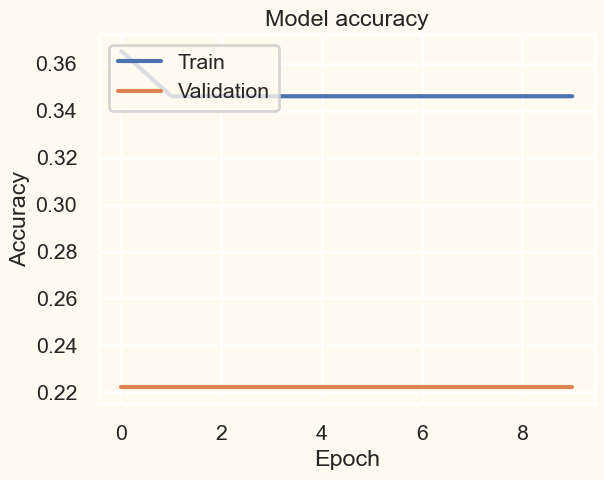

In [228]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [229]:
RNN_pred = RNN_model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


In [230]:
RNN_pred = (RNN_pred > 0.5).astype('int')

In [232]:
sentiment_labels = {0: 'Negative', 1: 'Positive', 2: 'Neutral'}

RNN_sentiments = [[sentiment_labels[val[0]]] for val in RNN_pred]
RNN_sentiments[0:10]

[['Positive'],
 ['Positive'],
 ['Positive'],
 ['Positive'],
 ['Positive'],
 ['Positive'],
 ['Positive'],
 ['Positive'],
 ['Positive'],
 ['Positive']]